<a href="https://colab.research.google.com/github/svoll1105/2025_Intro_Python/blob/main/notebook/W2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Ocean Floats Data Analysis

**Learning Objectives**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

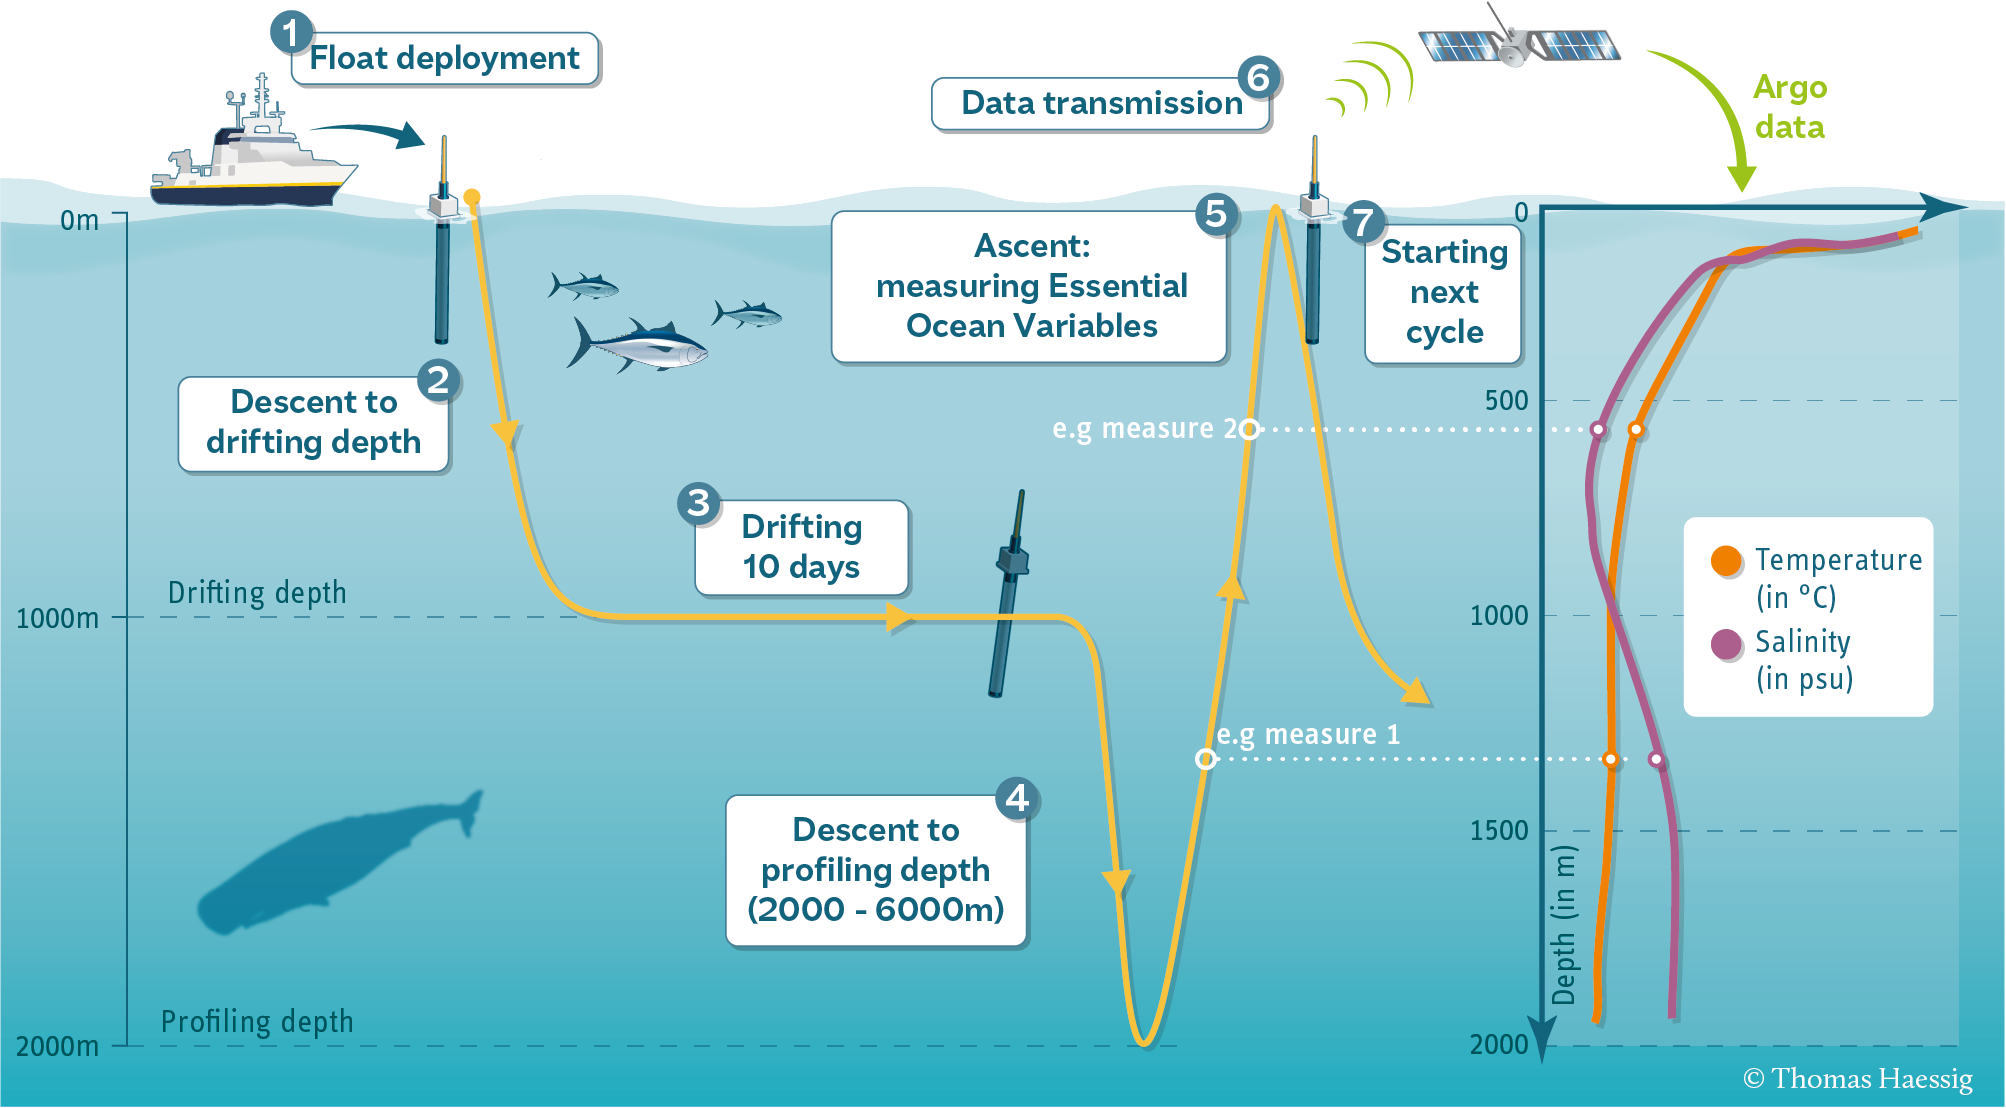


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [64]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy']

In [65]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [66]:
import numpy as np


In [67]:
for f in files:
    print(f)

def find_file(files, keyword): #fonction pour retrouver un fichier par mot clé
  return [f for f in files if keyword in f][0]
#Cette fonction cherche dans la liste files le premier fichier dont le nom contient le mot-clé
S = np.load(find_file(files, 'S.npy'))
T = np.load(find_file(files, 'T.npy'))
P = np.load(find_file(files, 'P.npy'))
date = np.load(find_file(files, 'date.npy'))
lat = np.load(find_file(files, 'lat.npy'))
lon = np.load(find_file(files, 'lon.npy'))
levels = np.load(find_file(files, 'levels.npy'))

/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy


1. List comprehension
La partie [f for f in files if keyword in f] est une list comprehension en Python.​

Elle parcourt chaque élément f dans la liste files.

Pour chaque f, elle vérifie si le texte keyword est contenu dans le nom du fichier (keyword in f).

Si c'est vrai, elle ajoute f à la nouvelle liste.

Résultat : tu obtiens une liste de tous les fichiers dont le nom contient le mot-clé.

Le [0] à la fin prend le premier élément de cette nouvelle liste.

Cela suppose qu'il n'y a qu'un seul fichier qui correspond, ou que tu veux juste le premier si plusieurs correspondent.


Then, load the files as `numpy` arrays, for instance using list comprehension

In [68]:
T, lat, S, levels, lon, P, date = [np.load(files[i]) for i in range(7)]

In [69]:
print(files)

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy']


T, lat, S, levels, lon, P, date = [np.load(files[i]) for i in range(7)]


Tu charges tous les fichiers en une seule ligne, en supposant que l’ordre des fichiers dans la liste files correspond à l’ordre des variables :

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [70]:
print(levels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recreate the `level` array using `np.arange` and call it `level_arange`

In [71]:
level_arange = np.arange(0,78)
print(level_arange)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [72]:
np.testing.assert_equal(levels,level_arange)

Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [73]:
level_linspace = np.linspace(0,77,78)
print(level_linspace)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77.]


Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [74]:
np.testing.assert_equal(levels,level_linspace)

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [75]:
T.shape
S.shape
P.shape
print(T.shape)
print(S.shape)
print(P.shape)
print(lon.shape)
print(lat.shape)
print(date.shape)
print(levels.shape)



(78, 75)
(78, 75)
(78, 75)
(75,)
(75,)
(75,)
(78,)


Les dimensions 78 et 75 sont partagées entre les tableaux.

Les 78 correspondent probablement aux niveaux de profondeur (par exemple, levels), et les 75 aux profils ou positions différentes (par exemple, lon, lat, date).

Ainsi, T, S, P contiennent des mesures (température, salinité, pression) pour chaque combinaison niveau × profil.

lon, lat, date sont des informations associées à chaque profil (75 profils).

Chaque ligne de T, S, P correspond à un niveau de profondeur (défini par levels).

Chaque colonne correspond à un profil (défini par la latitude, longitude et date).

Based on the shapes, which dimensions do you think are shared among the arrays?

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources:

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [76]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure.

In [77]:
!pip install gsw
from gsw import CT_from_t

Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [78]:
import numpy as np
from gsw import CT_from_t
CT = CT_from_t(T,S,P)

Calculate the `relative density` using the equation above

In [79]:

relative_density = a * S + b * CT + c * CT**2

**Q4) Make a plot for each column of data in `T`, `S`, `P`, and
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [80]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions.

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

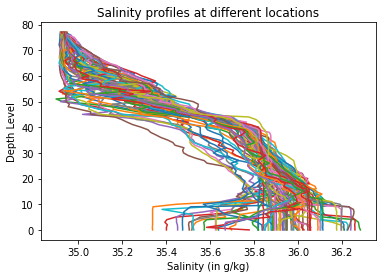

Text(0.5, 1.0, 'Salinity profiles at different locations')

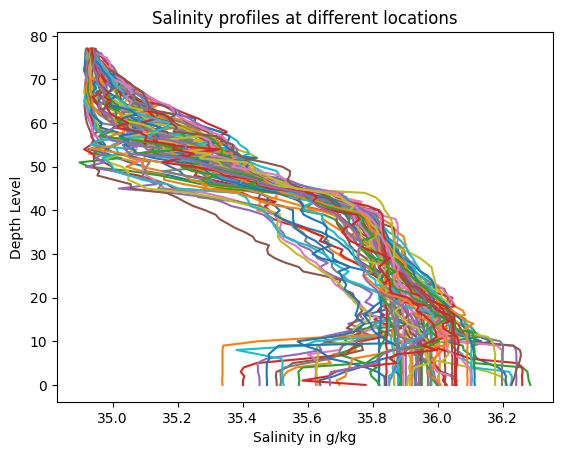

In [81]:
plt.plot(S,levels); # The semi-colon prevents printing the line objects
plt.xlabel('Salinity in g/kg') # Takes a string as argument
plt.ylabel('Depth Level')
plt.title('Salinity profiles at different locations')

Make more plots below:

Text(0.5, 1.0, 'Temperature profiles at different locations')

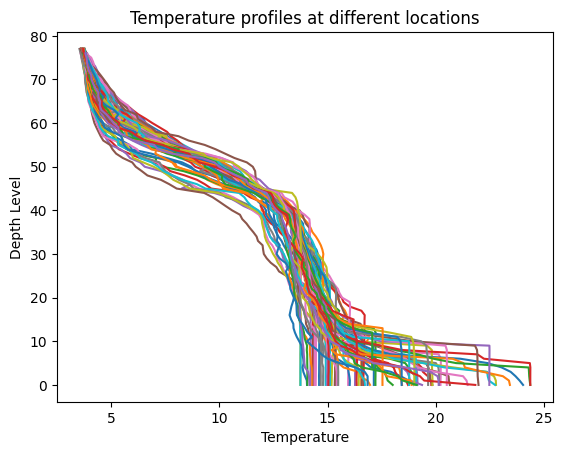

In [82]:
plt.plot(T,levels); # The semi-colon prevents printing the line objects
plt.xlabel('Temperature') # Takes a string as argument
plt.ylabel('Depth Level')
plt.title('Temperature profiles at different locations')

Text(0.5, 1.0, 'Pressure profiles at different locations')

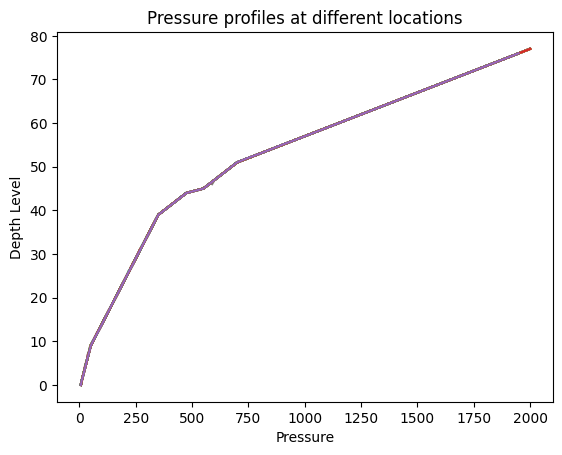

In [83]:
plt.plot(P,levels); # The semi-colon prevents printing the line objects
plt.xlabel('Pressure') # Takes a string as argument
plt.ylabel('Depth Level')
plt.title('Pressure profiles at different locations')

Text(0.5, 1.0, 'Depth as a function of relative density')

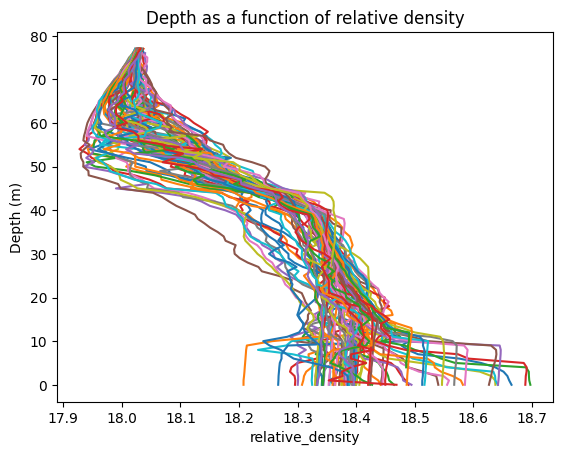

In [84]:
plt.plot(relative_density, levels)
plt.xlabel('relative_density')
plt.ylabel('Depth (m)')
plt.title('Depth as a function of relative density')

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

En faisant np.mean(T, axis=1), tu obtiens la moyenne de la température pour chaque niveau de profondeur, en prenant la moyenne sur tous les profils à ce niveau. C'est pareil pour la salinité, la pression, etc.

axis=1 : moyenne sur les colonnes (donc pour chaque ligne, c'est-à-dire pour chaque niveau de profondeur)

axis=0 : moyenne sur les lignes (donc pour chaque colonne, c'est-à-dire pour chaque profil)

In [92]:
tmean = np.nanmean(T, axis=1)
smean = np.mean(S, axis=1)
pmean = np.mean(P, axis=1)
rdmean = np.mean(relative_density, axis=1)


In [95]:
Tstd = np.nanstd(T,axis=1)
print(Tstd)


[2.92500898 2.86405591 2.83324563 2.75112353 2.60248422 2.42649165
 2.20220589 1.99752543 1.79105862 1.74132795 1.26608465 1.07857596
 0.89761236 0.79748479 0.68525328 0.6394096  0.61835635 0.59387877
 0.56010736 0.55009107 0.53183794 0.52634089 0.52668259 0.51009182
 0.49376838 0.48980214 0.48551874 0.48516171 0.49244536 0.50557331
 0.50881718 0.50482633 0.50093284 0.51411271 0.50962002 0.51399949
 0.52544584 0.53182873 0.5466501  0.55060902 0.56066216 0.57937588
 0.5989958  0.63392862 0.70640057 0.85775269 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815  0.25570195 0.21802589 0.17365755
 0.14408683 0.11509768 0.09214697 0.08062746 0.06846311 0.06550644]


... and the standard deviations.

In [ ]:
___ = ___.___(___,___)

Check that they have the same shape as your vertical level `lev` coordinate:

In [ ]:
np.testing.assert_equal(___.shape,lev.shape)

**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

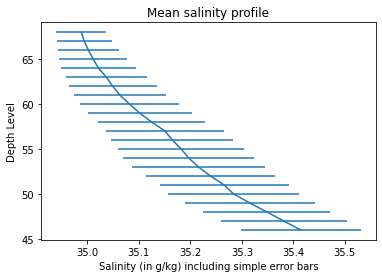

In [ ]:
plt.errorbar(___,___,xerr=___)
plt.xlabel(___)
plt.ylabel(___)
plt.title(___)

Three more plots and we'll be all set! 🙂

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

Similarly, recalculate the standard deviations ignoring the missing values.

**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface.

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

In [ ]:
plt.scatter(___,___)
___ # Fancy bonuses
___ # More fancy bonuses